In [4]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [5]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
torch.cuda.is_available()

True

# Prepare training dataset

In [7]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [8]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [10]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [11]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [12]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [13]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [14]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [15]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [16]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [17]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:06, 17.99it/s]                         


Epoch 1 of 100
Generator loss: 1.48140264, Discriminator loss: 0.85669404


118it [00:06, 18.96it/s]                         


Epoch 2 of 100
Generator loss: 2.90557122, Discriminator loss: 1.18355978


118it [00:06, 18.85it/s]                         


Epoch 3 of 100
Generator loss: 4.23820639, Discriminator loss: 0.50847995


118it [00:06, 18.73it/s]                         


Epoch 4 of 100
Generator loss: 2.38482833, Discriminator loss: 1.12016821


118it [00:06, 19.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


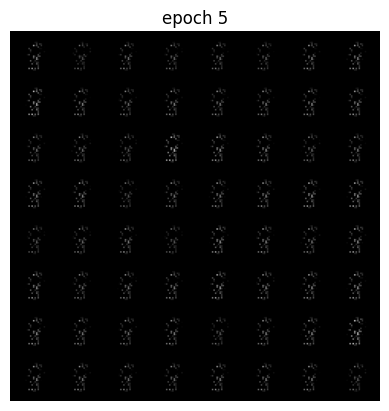

Epoch 5 of 100
Generator loss: 2.24353194, Discriminator loss: 0.95359421


118it [00:06, 18.96it/s]                         


Epoch 6 of 100
Generator loss: 2.27170587, Discriminator loss: 1.19165087


118it [00:06, 18.77it/s]                         


Epoch 7 of 100
Generator loss: 1.97152460, Discriminator loss: 0.93767077


118it [00:06, 18.48it/s]                         


Epoch 8 of 100
Generator loss: 1.45606899, Discriminator loss: 1.18503261


118it [00:06, 18.51it/s]                         


Epoch 9 of 100
Generator loss: 1.45976746, Discriminator loss: 0.96210581


118it [00:06, 19.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


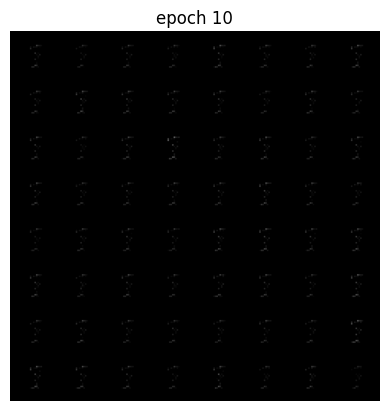

Epoch 10 of 100
Generator loss: 0.70480633, Discriminator loss: 1.47709417


118it [00:06, 19.10it/s]                         


Epoch 11 of 100
Generator loss: 0.94853878, Discriminator loss: 1.13192880


118it [00:06, 19.17it/s]                         


Epoch 12 of 100
Generator loss: 1.79908371, Discriminator loss: 0.66236776


118it [00:06, 19.04it/s]                         


Epoch 13 of 100
Generator loss: 2.83250117, Discriminator loss: 0.51257229


118it [00:06, 18.74it/s]                         


Epoch 14 of 100
Generator loss: 2.91721535, Discriminator loss: 0.62625355


118it [00:06, 19.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


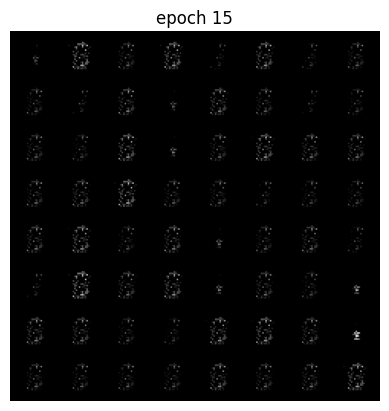

Epoch 15 of 100
Generator loss: 2.95151043, Discriminator loss: 0.41251063


118it [00:06, 19.06it/s]                         


Epoch 16 of 100
Generator loss: 3.63859630, Discriminator loss: 0.32272568


118it [00:06, 18.99it/s]                         


Epoch 17 of 100
Generator loss: 3.23760819, Discriminator loss: 0.42804855


118it [00:06, 19.19it/s]                         


Epoch 18 of 100
Generator loss: 3.29478741, Discriminator loss: 0.44812888


118it [00:06, 19.06it/s]                         


Epoch 19 of 100
Generator loss: 2.97193646, Discriminator loss: 0.70561314


118it [00:06, 18.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


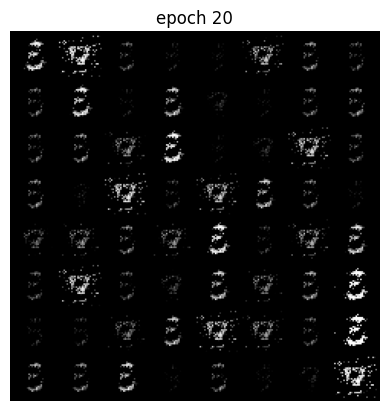

Epoch 20 of 100
Generator loss: 3.65608549, Discriminator loss: 0.51757151


118it [00:06, 19.25it/s]                         


Epoch 21 of 100
Generator loss: 2.67531824, Discriminator loss: 0.52170891


118it [00:06, 19.27it/s]                         


Epoch 22 of 100
Generator loss: 2.78256559, Discriminator loss: 0.57740539


118it [00:06, 19.30it/s]                         


Epoch 23 of 100
Generator loss: 2.60406160, Discriminator loss: 0.59219277


118it [00:06, 19.28it/s]                         


Epoch 24 of 100
Generator loss: 2.87298059, Discriminator loss: 0.51324731


118it [00:06, 19.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


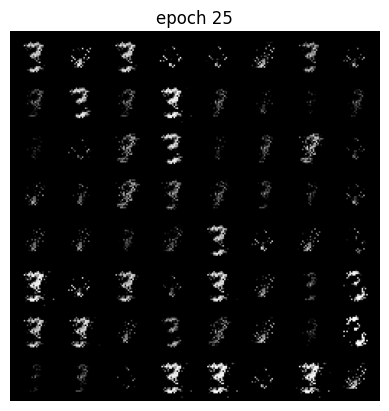

Epoch 25 of 100
Generator loss: 3.20807910, Discriminator loss: 0.40936741


118it [00:06, 19.04it/s]                         


Epoch 26 of 100
Generator loss: 2.79220724, Discriminator loss: 0.64494056


118it [00:06, 19.08it/s]                         


Epoch 27 of 100
Generator loss: 2.69065809, Discriminator loss: 0.52399331


118it [00:06, 19.07it/s]                         


Epoch 28 of 100
Generator loss: 2.81907701, Discriminator loss: 0.47574708


118it [00:06, 19.19it/s]                         


Epoch 29 of 100
Generator loss: 3.21398211, Discriminator loss: 0.45360684


118it [00:06, 19.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


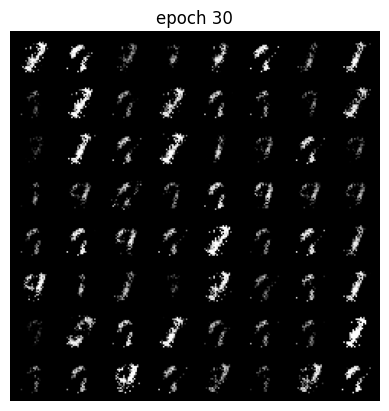

Epoch 30 of 100
Generator loss: 3.03095198, Discriminator loss: 0.52681154


118it [00:06, 18.82it/s]                         


Epoch 31 of 100
Generator loss: 2.89292049, Discriminator loss: 0.49499413


118it [00:06, 19.09it/s]                         


Epoch 32 of 100
Generator loss: 3.16077638, Discriminator loss: 0.55295825


118it [00:06, 18.95it/s]                         


Epoch 33 of 100
Generator loss: 2.81886911, Discriminator loss: 0.52081817


118it [00:06, 19.02it/s]                         


Epoch 34 of 100
Generator loss: 2.93261504, Discriminator loss: 0.54705489


118it [00:06, 19.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


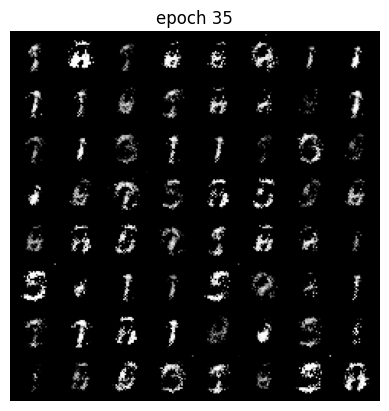

Epoch 35 of 100
Generator loss: 3.07810283, Discriminator loss: 0.44076791


118it [00:06, 18.96it/s]                         


Epoch 36 of 100
Generator loss: 2.82287192, Discriminator loss: 0.56420422


118it [00:06, 18.92it/s]                         


Epoch 37 of 100
Generator loss: 2.85377860, Discriminator loss: 0.56375492


118it [00:06, 19.03it/s]                         


Epoch 38 of 100
Generator loss: 2.74169135, Discriminator loss: 0.60581225


118it [00:06, 18.92it/s]                         


Epoch 39 of 100
Generator loss: 3.03011990, Discriminator loss: 0.52209294


118it [00:06, 19.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


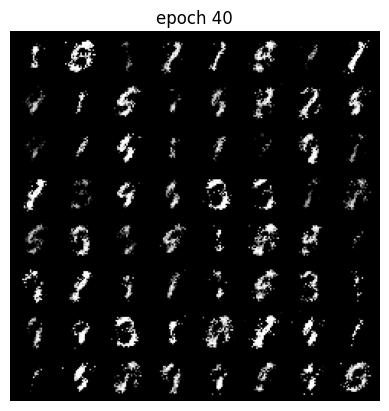

Epoch 40 of 100
Generator loss: 2.99390936, Discriminator loss: 0.48019251


118it [00:06, 19.03it/s]                         


Epoch 41 of 100
Generator loss: 2.90995550, Discriminator loss: 0.54807937


118it [00:06, 18.82it/s]                         


Epoch 42 of 100
Generator loss: 2.72849250, Discriminator loss: 0.54044574


118it [00:06, 19.05it/s]                         


Epoch 43 of 100
Generator loss: 3.08019757, Discriminator loss: 0.51594943


118it [00:06, 18.95it/s]                         


Epoch 44 of 100
Generator loss: 2.88331866, Discriminator loss: 0.56438303


118it [00:06, 18.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


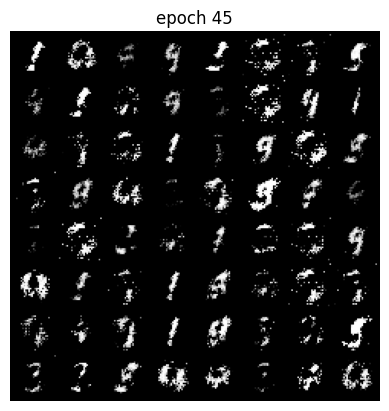

Epoch 45 of 100
Generator loss: 2.87712693, Discriminator loss: 0.52806103


118it [00:06, 19.20it/s]                         


Epoch 46 of 100
Generator loss: 2.97645998, Discriminator loss: 0.48867196


118it [00:06, 19.12it/s]                         


Epoch 47 of 100
Generator loss: 2.84136510, Discriminator loss: 0.53209192


118it [00:06, 18.96it/s]                         


Epoch 48 of 100
Generator loss: 2.91048813, Discriminator loss: 0.57663476


118it [00:06, 19.32it/s]                         


Epoch 49 of 100
Generator loss: 2.83490157, Discriminator loss: 0.61591107


118it [00:06, 19.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


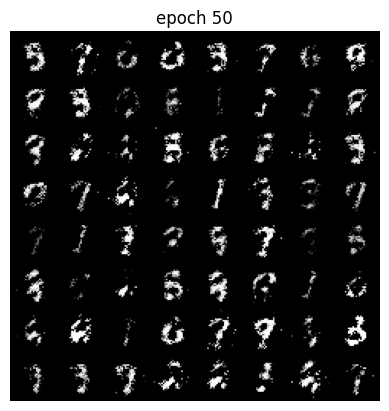

Epoch 50 of 100
Generator loss: 2.52136135, Discriminator loss: 0.65590280


118it [00:06, 18.94it/s]                         


Epoch 51 of 100
Generator loss: 2.69935918, Discriminator loss: 0.58203226


118it [00:06, 18.94it/s]                         


Epoch 52 of 100
Generator loss: 2.74760246, Discriminator loss: 0.60525548


118it [00:06, 18.83it/s]                         


Epoch 53 of 100
Generator loss: 2.80199718, Discriminator loss: 0.49072719


118it [00:06, 18.96it/s]                         


Epoch 54 of 100
Generator loss: 2.62726307, Discriminator loss: 0.64376354


118it [00:06, 18.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


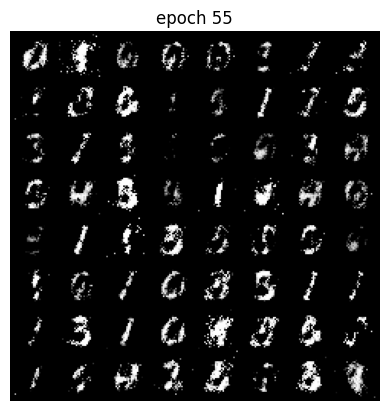

Epoch 55 of 100
Generator loss: 2.64943147, Discriminator loss: 0.64096516


118it [00:06, 19.27it/s]                         


Epoch 56 of 100
Generator loss: 2.75364780, Discriminator loss: 0.54936439


118it [00:06, 19.14it/s]                         


Epoch 57 of 100
Generator loss: 2.88414836, Discriminator loss: 0.59209991


118it [00:06, 19.21it/s]                         


Epoch 58 of 100
Generator loss: 2.64864230, Discriminator loss: 0.61426419


118it [00:06, 19.00it/s]                         


Epoch 59 of 100
Generator loss: 2.64617968, Discriminator loss: 0.63085097


118it [00:06, 19.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


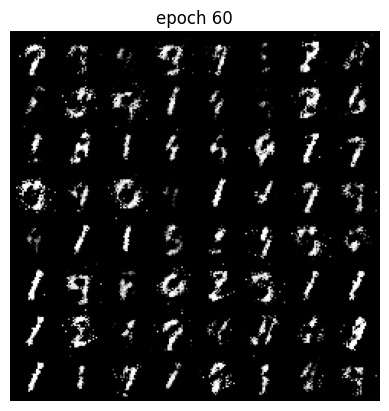

Epoch 60 of 100
Generator loss: 2.45080948, Discriminator loss: 0.66288662


118it [00:06, 18.96it/s]                         


Epoch 61 of 100
Generator loss: 2.58265591, Discriminator loss: 0.61468017


118it [00:06, 18.80it/s]                         


Epoch 62 of 100
Generator loss: 2.65180445, Discriminator loss: 0.61778963


118it [00:06, 17.78it/s]                         


Epoch 63 of 100
Generator loss: 2.67280293, Discriminator loss: 0.60414362


118it [00:06, 17.26it/s]                         


Epoch 64 of 100
Generator loss: 2.44778013, Discriminator loss: 0.66306698


118it [00:07, 15.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


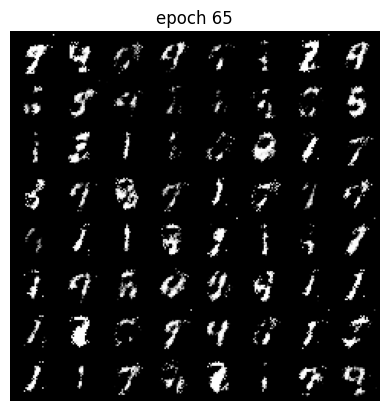

Epoch 65 of 100
Generator loss: 2.40946198, Discriminator loss: 0.66150296


118it [00:07, 15.57it/s]                         


Epoch 66 of 100
Generator loss: 2.33422470, Discriminator loss: 0.74048120


118it [00:07, 16.80it/s]                         


Epoch 67 of 100
Generator loss: 2.48626065, Discriminator loss: 0.65370613


118it [00:06, 18.46it/s]                         


Epoch 68 of 100
Generator loss: 2.39907074, Discriminator loss: 0.63321245


118it [00:06, 17.93it/s]                         


Epoch 69 of 100
Generator loss: 2.34409857, Discriminator loss: 0.64478338


118it [00:06, 18.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


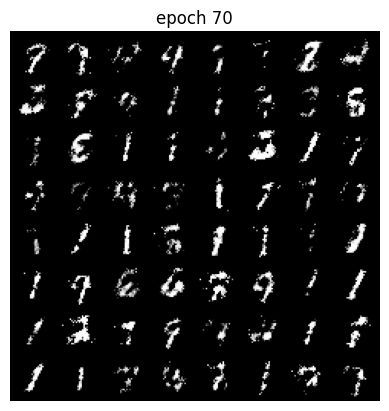

Epoch 70 of 100
Generator loss: 2.25933838, Discriminator loss: 0.68445599


118it [00:06, 18.86it/s]                         


Epoch 71 of 100
Generator loss: 2.22400618, Discriminator loss: 0.70354372


118it [00:06, 18.95it/s]                         


Epoch 72 of 100
Generator loss: 2.07239985, Discriminator loss: 0.75573206


118it [00:06, 18.92it/s]                         


Epoch 73 of 100
Generator loss: 2.38591576, Discriminator loss: 0.68940675


118it [00:06, 18.70it/s]                         


Epoch 74 of 100
Generator loss: 2.16530013, Discriminator loss: 0.73602724


118it [00:06, 18.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


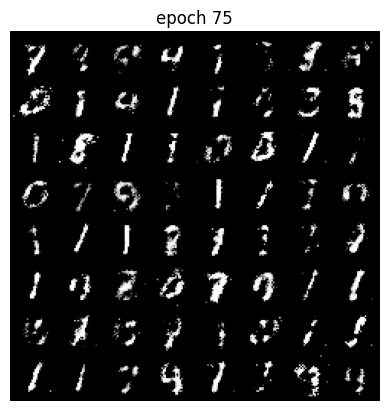

Epoch 75 of 100
Generator loss: 2.05557346, Discriminator loss: 0.73694223


118it [00:06, 18.63it/s]                         


Epoch 76 of 100
Generator loss: 2.17768049, Discriminator loss: 0.74698168


118it [00:06, 18.90it/s]                         


Epoch 77 of 100
Generator loss: 2.11796808, Discriminator loss: 0.72618645


118it [00:06, 18.43it/s]                         


Epoch 78 of 100
Generator loss: 2.31647801, Discriminator loss: 0.69244069


118it [00:06, 18.83it/s]                         


Epoch 79 of 100
Generator loss: 2.27186728, Discriminator loss: 0.69444472


118it [00:06, 18.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


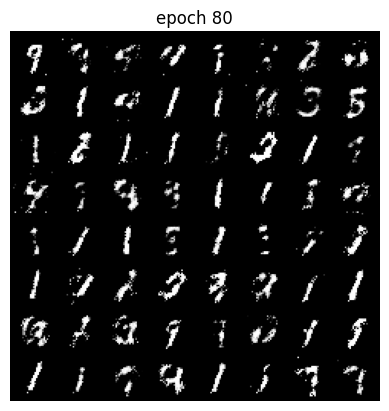

Epoch 80 of 100
Generator loss: 2.29692841, Discriminator loss: 0.67844605


118it [00:06, 18.68it/s]                         


Epoch 81 of 100
Generator loss: 2.27911854, Discriminator loss: 0.69605041


118it [00:06, 18.82it/s]                         


Epoch 82 of 100
Generator loss: 2.38712525, Discriminator loss: 0.68788528


118it [00:06, 18.68it/s]                         


Epoch 83 of 100
Generator loss: 2.37949467, Discriminator loss: 0.66881913


118it [00:06, 18.80it/s]                         


Epoch 84 of 100
Generator loss: 2.25880456, Discriminator loss: 0.71273708


118it [00:06, 18.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


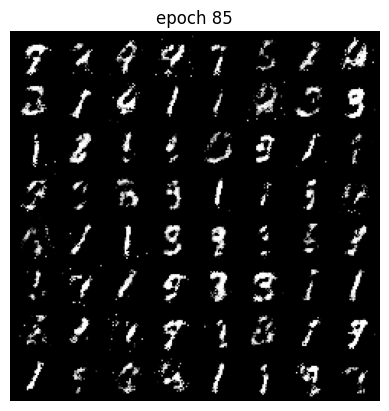

Epoch 85 of 100
Generator loss: 2.16985869, Discriminator loss: 0.75917107


118it [00:06, 19.04it/s]                         


Epoch 86 of 100
Generator loss: 2.07631588, Discriminator loss: 0.75939447


118it [00:06, 18.68it/s]                         


Epoch 87 of 100
Generator loss: 2.10936117, Discriminator loss: 0.76168925


118it [00:06, 18.99it/s]                         


Epoch 88 of 100
Generator loss: 2.04515982, Discriminator loss: 0.76696002


118it [00:06, 19.03it/s]                         


Epoch 89 of 100
Generator loss: 2.05738449, Discriminator loss: 0.77162588


118it [00:06, 19.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


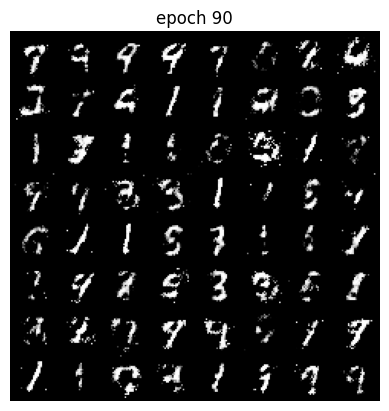

Epoch 90 of 100
Generator loss: 1.94187987, Discriminator loss: 0.78646630


118it [00:06, 18.78it/s]                         


Epoch 91 of 100
Generator loss: 1.87423849, Discriminator loss: 0.81595778


118it [00:06, 18.70it/s]                         


Epoch 92 of 100
Generator loss: 1.97462440, Discriminator loss: 0.82548320


118it [00:06, 18.79it/s]                         


Epoch 93 of 100
Generator loss: 1.95018208, Discriminator loss: 0.81684375


118it [00:06, 18.80it/s]                         


Epoch 94 of 100
Generator loss: 1.83197176, Discriminator loss: 0.81669199


118it [00:06, 18.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


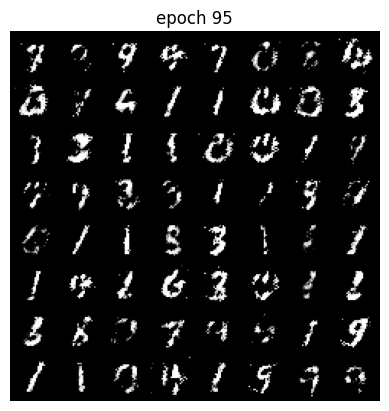

Epoch 95 of 100
Generator loss: 2.00523424, Discriminator loss: 0.75902295


118it [00:06, 18.94it/s]                         


Epoch 96 of 100
Generator loss: 1.98813677, Discriminator loss: 0.78079027


118it [00:06, 18.96it/s]                         


Epoch 97 of 100
Generator loss: 2.05722785, Discriminator loss: 0.76029211


118it [00:06, 18.49it/s]                         


Epoch 98 of 100
Generator loss: 2.04637265, Discriminator loss: 0.79098421


118it [00:06, 18.98it/s]                         


Epoch 99 of 100
Generator loss: 2.05431986, Discriminator loss: 0.79125446


118it [00:06, 18.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


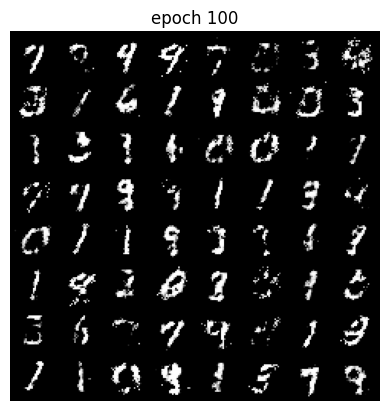

Epoch 100 of 100
Generator loss: 1.95388174, Discriminator loss: 0.80751443


In [18]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    # print('output_gen=')
    # print(output.tolist())
    # print('true_label=')
    # print(true_label.tolist())
    l_g = criterion(output, true_label)
    # l_g /= len(output)
    return l_g
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    # print('output_disc=')
    # print(output.tolist())
    # print('true_label=')
    # print(true_label.tolist())
    l_d = criterion(output, true_label)
    # l_d /= len(output) 
    return l_d
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########         
        data_len = len(data[0]) # <-- not every batch will be of length train_loader.batch_size

        # Sample minibatch of m noise samples { z_1, ... , z_m } from noise prior p_g(z)
        samples_noise = create_noise(data_len, nz)

        # Sample miniabtch of m examples { x_1, ... , x_m } from the data
        samples_data = data[0].to(device)

        # Update the discriminator by ascending its stochastic gradient:
        optim_d.zero_grad()

        pred_gen_noise = generator.forward(samples_noise)        
        pred_dis_noise = discriminator.forward(pred_gen_noise)
        pred_dis_data = discriminator.forward(samples_data)

        expr_to_grad_d = discriminator_loss(pred_dis_data, label_fake(data_len)) + discriminator_loss(pred_dis_noise, label_real(data_len))
        # expr_to_grad_d = discriminator_loss(torch.cat((pred_dis_data, pred_dis_noise)), torch.cat((label_fake(data_len), label_real(data_len))))
        loss_d += expr_to_grad_d
        expr_to_grad_d /= data_len
        # print(f'expr_to_grad_d={expr_to_grad_d}')
        expr_to_grad_d.backward()
        optim_d.step()

        # Update the generator by ascending its stochastic gradient:
        optim_g.zero_grad()

        # Sample minibatch of m noise samples { z_1, ... , z_m } from noise prior p_g(z) <-- different from first step, no reason to be same
        # samples_noise = create_noise(data_len, nz)
        pred_gen_noise = generator.forward(samples_noise)
        pred_dis_noise = discriminator.forward(pred_gen_noise)

        expr_to_grad_g = generator_loss(pred_dis_noise, label_fake(data_len))
        loss_g += expr_to_grad_g
        expr_to_grad_g /= data_len
        # print(f'expr_to_grad_g={expr_to_grad_g}')
        expr_to_grad_g.backward()
        optim_g.step()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [19]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [20]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

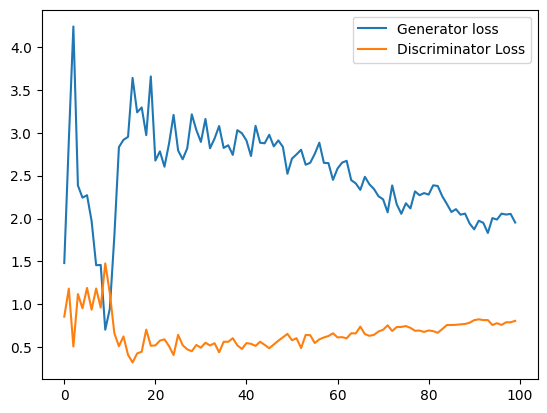

In [24]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot([l.item() for l in losses_g], label='Generator loss')
plt.plot([l.item() for l in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

In [25]:
print([l.item() for l in losses_g])
print([l.item() for l in losses_d])

[1.4814026355743408, 2.905571222305298, 4.238206386566162, 2.3848283290863037, 2.2435319423675537, 2.2717058658599854, 1.9715245962142944, 1.456068992614746, 1.459767460823059, 0.7048063278198242, 0.9485387802124023, 1.7990837097167969, 2.832501173019409, 2.917215347290039, 2.951510429382324, 3.638596296310425, 3.2376081943511963, 3.2947874069213867, 2.9719364643096924, 3.65608549118042, 2.6753182411193848, 2.7825655937194824, 2.6040616035461426, 2.8729805946350098, 3.2080790996551514, 2.7922072410583496, 2.6906580924987793, 2.8190770149230957, 3.213982105255127, 3.030951976776123, 2.89292049407959, 3.160776376724243, 2.818869113922119, 2.932615041732788, 3.0781028270721436, 2.8228719234466553, 2.853778600692749, 2.7416913509368896, 3.0301198959350586, 2.9939093589782715, 2.9099555015563965, 2.728492498397827, 3.08019757270813, 2.8833186626434326, 2.877126932144165, 2.9764599800109863, 2.841365098953247, 2.9104881286621094, 2.8349015712738037, 2.5213613510131836, 2.699359178543091, 2.7